In [23]:
import os
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as ctx
from pathlib import Path

# Configure matplotlib
%matplotlib inline

In [24]:
# Constants
DATA_DIR = Path('../data/raw/subset_50')
FILENAME = "4494499.csv"  # Specify the filename directly

file_path = DATA_DIR / FILENAME

if not file_path.exists():
    print(f"File {FILENAME} not found in {DATA_DIR}. Listing available files:")
    files = sorted([f for f in os.listdir(DATA_DIR) if f.endswith('.csv')])
    print(files)
    raise FileNotFoundError(f"File {FILENAME} not found.")

print(f"Selected file: {file_path}")

Selected file: ..\data\raw\subset_50\4494499.csv


In [25]:
# Load data
df = pd.read_csv(file_path)
print(f"Loaded {len(df)} rows from {FILENAME}.")

# Create GeoDataFrame for raw GPS points
gdf = gpd.GeoDataFrame(
    df, geometry=gpd.points_from_xy(df.longitude, df.latitude), crs="EPSG:4326"
)

# Create GeoDataFrame for matched points
gdf_matched = gpd.GeoDataFrame(
    df, geometry=gpd.points_from_xy(df.matched_longitude, df.matched_latitude), crs="EPSG:4326"
)

# Convert to Web Mercator (EPSG:3857) for contextily
gdf_wm = gdf.to_crs(epsg=3857)
gdf_matched_wm = gdf_matched.to_crs(epsg=3857)

gdf.head()

Loaded 616 rows from 4494499.csv.


,time,latitude,longitude,altitude,osm_way_id,matched_latitude,matched_longitude,matched_distance,matched_type,geometry
0,2022-06-23 16:25:08,40.609330,-73.969993,-31.567,297831432,40.609328,-73.970003,0.954074,True,POINT (-73.96999 40.60933)
1,2022-06-23 16:25:09,40.609330,-73.969992,-31.762,297831432,40.609328,-73.970003,0.989352,False,POINT (-73.96999 40.60933)
2,2022-06-23 16:25:10,40.609329,-73.969991,-32.284,297831432,40.609327,-73.970003,1.072918,False,POINT (-73.96999 40.60933)
3,2022-06-23 16:25:11,40.609329,-73.969990,-32.395,297831432,40.609327,-73.970003,1.163226,False,POINT (-73.96999 40.60933)
4,2022-06-23 16:25:12,40.609328,-73.969989,-32.529,297831432,40.609326,-73.970003,1.228607,False,POINT (-73.96999 40.60933)


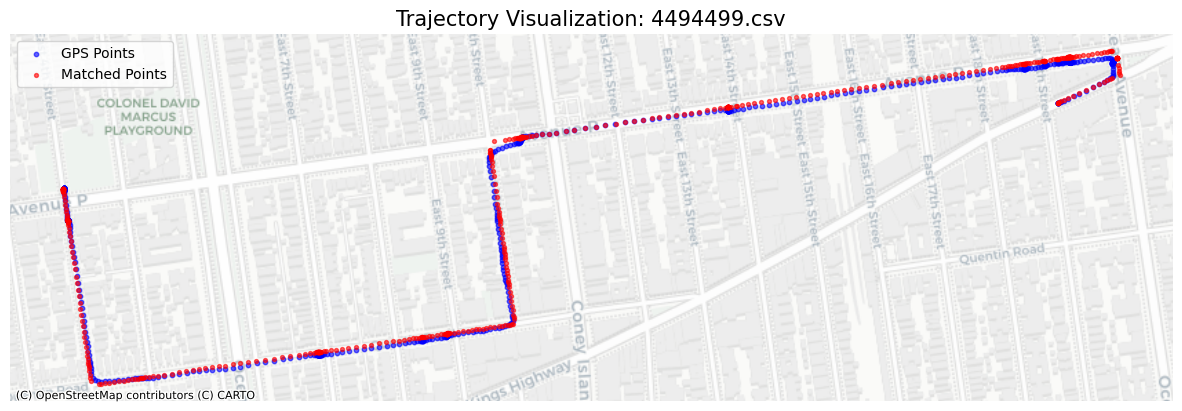

In [26]:
# Plot the trajectory with background map
fig, ax = plt.subplots(figsize=(15, 15))

# Plot raw points
gdf_wm.plot(ax=ax, markersize=10, color='blue', alpha=0.6, label='GPS Points')

# Plot matched points
gdf_matched_wm.plot(ax=ax, markersize=8, color='red', alpha=0.6, label='Matched Points')

# Add background map
ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron)

ax.set_title(f"Trajectory Visualization: {FILENAME}", fontsize=15)
ax.set_axis_off()  # Hide axis for cleaner map view
plt.legend()
plt.show()